# UMAP visualization of high-dimensional transformer output

In [1]:
import numpy as np
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import umap
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# import seaborn as sns
import json

# %matplotlib inline
init_notebook_mode(connected=True)

In [19]:
with open("./output/features.json") as f:
    vec_features = [json.loads(line) for line in f]

In [75]:
# vec_features[0]

In [61]:
# sns.set(style='white', context='notebook', rc={'figure.figsize':(16,14)})
np.random.seed(42)
data = np.array([feature.get("values") for feature in vec_features])
labels = [feature["label"] for feature in vec_features]
ids = [feature["linex_index"] for feature in vec_features]
sizes = [feature["confidence"] for feature in vec_features]
corrects = [str(100*int(feature["prediction"]!=feature["label"])) for feature in vec_features]
data.shape

(1000, 768)

In [4]:
reducer = umap.UMAP()
%time embedding = reducer.fit_transform(data)

CPU times: user 43.2 s, sys: 2.32 s, total: 45.6 s
Wall time: 46.5 s


In [73]:
trace = go.Scattergl(
    x = embedding[:,0],
    y = embedding[:,1],
    text=ids,
    hoverinfo="text",
#     hovermode="closest",
    mode = "markers",
    marker = go.scattergl.Marker(
        color=labels,
        colorscale="Jet",
        size=sizes,
        opacity=.9,
        sizemin=2,
        
    )
    
)


In [71]:
fig = go.FigureWidget(
    data=[trace],
    layout=go.Layout(hovermode="closest")
)

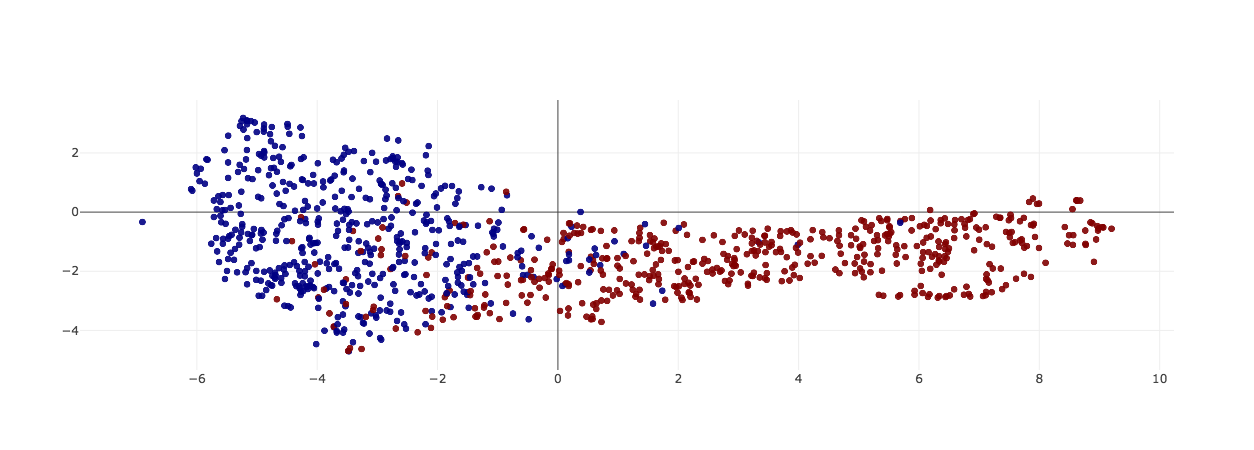

In [72]:
iplot(fig)

In [8]:
far_left = [598349354, 695303878, 711615030, 815685337]
far_right = [1034785985, 1074383661, 920535943, 928303265, 1033908295, 910668253]
mid_left = [848566915, 997294192, 803058806]
mid_right = [1177828196, 727960065, 1088785840, 695026205]